## This is our workspace for statistical analysis!

Add cells, do exploratory analysis, go ham.

In [1]:
# feel free to add more

import sqlite3
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.tools import eval_measures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
# Create connection to database
conn = sqlite3.connect('../data/db/avocado_project.db')
c = conn.cursor()

In [3]:
# Print out tables in database
list_tables_cmd = "SELECT name FROM sqlite_master WHERE type='table';"
c.execute(list_tables_cmd)
conn.commit()

for row in c:
  print(row)

('demographic',)
('hab2016_region',)
('hab2017_region',)
('hab2018_region',)
('joined_data',)
('millenial_percentages',)
('hab2016_citystate',)
('hab2017_citystate',)
('hab2018_citystate',)


In [22]:
# load in merged_citylevel_data
file = "../data/csv/merged_citylevel_data.csv"
merged_df = pd.read_csv(file)

In [7]:
# Load all tables into dataframe
query1 = "SELECT * FROM demographic"
demo_df = pd.read_sql(query1, conn)

query2 = "SELECT * FROM hab2016_region"
hab2016_df = pd.read_sql(query2, conn)
hab2016_df.rename(columns={'units_current_year': '2016_units_current_year',
                          'dollars_current_year': '2016_dollars_current_year',
                          'asp_current_year': '2016_asp_current_year'}, inplace=True)

query3 = "SELECT * FROM hab2017_region"
hab2017_df = pd.read_sql(query3, conn)
hab2017_df.rename(columns={'units_current_year': '2017_units_current_year',
                          'dollars_current_year': '2017_dollars_current_year',
                          'asp_current_year': '2017_asp_current_year'}, inplace=True)

query4 = "SELECT * FROM hab2018_region"
hab2018_df = pd.read_sql(query4, conn)
hab2018_df.rename(columns={'units_current_year': '2018_units_current_year',
                          'dollars_current_year': '2018_dollars_current_year',
                          'asp_current_year': '2018_asp_current_year'}, inplace=True)

In [8]:
mean_pop = []
median_pop = []
stddev_pop = []

for index, row in demo_df.iterrows():
    pop_list = [row['pop2016'], row['pop2017'], row['pop2018']]
    means = np.mean(pop_list)
    median = np.median(pop_list)
    std_dev = np.std(pop_list)
    mean_pop.append(means)
    median_pop.append(median)
    stddev_pop.append(std_dev)
    
demo_df["Mean Population"] = mean_pop
demo_df["Median Population"] = median_pop
demo_df["Standard Deviation Population"] = stddev_pop

In [10]:
# Load all tables into dataframe
# query1 = "SELECT * FROM demographic"
# demo_df = pd.read_sql(query1, conn)

query2 = "SELECT * FROM hab2016_region"
hab2016_raw_df = pd.read_sql(query2, conn)
hab2016_raw_df['Year'] = 2016

query3 = "SELECT * FROM hab2017_region"
hab2017_raw_df = pd.read_sql(query3, conn)
hab2017_raw_df['Year'] = 2017

query4 = "SELECT * FROM hab2018_region"
hab2018_raw_df = pd.read_sql(query4, conn)
hab2018_raw_df['Year'] = 2018

In [11]:
# join all three avocado data frames
hab_df = pd.concat([hab2016_raw_df, hab2017_raw_df, hab2018_raw_df], axis=1)

In [12]:
region = []
current_units_mean = []
current_units_median = []
current_units_stddev = []

current_dollars_mean = []
current_dollars_median = []
current_dollars_stddev = []

current_asp_mean = []
current_asp_median = []
current_asp_stddev = []

for index, row in hab2016_df.iterrows(): 
    region.append(row['region'])
    for index1, row1 in hab2017_df.iterrows():
        for index2, row2 in hab2018_df.iterrows():
            current_units_list = [row['2016_units_current_year'], row1['2017_units_current_year'], row2['2018_units_current_year']]
            current_dollars_list = [row['2016_dollars_current_year'], row1['2017_dollars_current_year'], row2['2018_dollars_current_year']]
            current_asp_list = [row['2016_asp_current_year'], row1['2017_asp_current_year'], row2['2018_asp_current_year']]
            
    units_mean = np.mean(current_units_list)
    units_median = np.median(current_units_list)
    units_std_dev = np.std(current_units_list)
    current_units_mean.append(units_mean)
    current_units_median.append(units_median)
    current_units_stddev.append(units_std_dev)
            
    dollars_mean = np.mean(current_dollars_list)
    dollars_median = np.median(current_dollars_list)
    dollars_std_dev = np.std(current_dollars_list)
    current_dollars_mean.append(dollars_mean)
    current_dollars_median.append(dollars_median)
    current_dollars_stddev.append(dollars_std_dev)
            
    asp_mean = np.mean(current_asp_list)  
    asp_median = np.median(current_asp_list)
    asp_std_dev = np.std(current_asp_list)  
    current_asp_mean.append(asp_mean)
    current_asp_median.append(asp_median)
    current_asp_stddev.append(asp_std_dev)
            
combined_avo_data = {'region' : region,
                     'units_current_year_mean' : current_units_mean, 
                     'units_current_year_median' : current_units_median,
                    'units_current_year_std_dev' : current_units_stddev,
                    'dollars_current_year_mean' : current_dollars_mean, 
                     'dollars_current_year_median' : current_dollars_median,
                    'dollars_current_year_std_dev' : current_dollars_stddev,
                    'asp_current_year_mean' : current_asp_mean, 
                     'asp_current_year_median' : current_asp_median,
                    'asp_current_year_std_dev' : current_asp_stddev}

combined_avo_df = pd.DataFrame(combined_avo_data)

In [13]:
# summarize dataframe
demo_df.describe()

,age,pop2016,pop2017,pop2018,Mean Population,Median Population,Standard Deviation Population
count,1392.000000,1.392000e+03,1.392000e+03,1.392000e+03,1.392000e+03,1.392000e+03,1392.000000
mean,53.494253,4.594373e+05,4.624431e+05,4.653553e+05,4.624119e+05,4.622160e+05,5359.585799
std,104.939063,2.169294e+06,2.182227e+06,2.194852e+06,2.182099e+06,2.182249e+06,14137.928956
min,0.000000,2.898500e+04,2.899400e+04,2.861700e+04,2.886533e+04,2.898500e+04,30.575953
25%,21.000000,1.620888e+05,1.661180e+05,1.762585e+05,1.676595e+05,1.655555e+05,1785.079136
50%,43.000000,2.488850e+05,2.496150e+05,2.505665e+05,2.499790e+05,2.497560e+05,3103.094626
75%,65.000000,2.848312e+05,2.860640e+05,2.871700e+05,2.858525e+05,2.860572e+05,5247.021563
max,999.000000,2.909011e+07,2.909579e+07,2.911077e+07,2.909889e+07,2.909579e+07,222560.118711


NameError: name 'joined_data' is not defined

In [14]:
# parse out rows that correspon to millenials
demo_df = demo_df.loc[(demo_df['age'] <= 35) & (demo_df['age'] >= 20)]
# todo sum F and M together to get total population

In [23]:
merged_df

,city,percent_millenial,total_population,per_cap_consumption,per_cap_dollar_sales,units_current_year,dollars_current_year,asp_current_year,year
0,Albany,22.0,"97,726",56.464359,77.465250,5.518036e+06,7.570369e+06,19.370834,2017
1,Atlanta,26.0,"491,763",57.869124,73.631820,2.845789e+07,3.620940e+07,17.986100,2017
2,Baltimore/Washington,23.0,"693,972",64.454312,94.508561,4.472949e+07,6.558630e+07,20.579243,2017
3,Boise,26.0,"227,621",19.203173,26.754134,4.371045e+06,6.089803e+06,19.602443,2017
4,Boston,23.0,688276,44.897423,67.174874,3.090182e+07,4.623485e+07,21.046124,2017
5,Buffalo/Rochester,26.1,"206,483",41.017719,58.333023,8.469462e+06,1.204478e+07,19.824338,2017
6,Charlotte,25.0,"859,347",14.553037,20.668500,1.250611e+07,1.776141e+07,20.006684,2017
7,Chicago,24.0,2713000,15.943954,24.600782,4.325595e+07,6.674192e+07,22.211855,2017
8,Cincinnati/Dayton,26.0,"301,648",44.899463,61.883576,1.354383e+07,1.866706e+07,19.575274,2017
9,Columbus,29.0,"881,763",11.384823,13.783786,1.003872e+07,1.215403e+07,17.212544,2017


In [28]:
query = "SELECT * FROM joined_data"
df = pd.read_sql(query, conn)
millenialpop = df['millenial_pop']
boomerpop = df['boomer_pop']
totalpop = df['total_pop']
millenialpercent = (millenialpop / totalpop) * 100
boomerpercent = (boomerpop / totalpop) * 100
df['millenial_pop_percent'] = millenialpercent
df['boomer_percent'] = boomerpercent
df

,region,year,millenial_pop,boomer_pop,total_avo_sold,total_pop,per_cap_avo_sold,units_prior_year,units_current_year,dollars_prior_year,dollars_current_year,asp_prior_year,asp_current_year,millenial_pop_percent,boomer_percent
0,California,2016,9181203,20309605,274291200,39051551,7.02,2.815620e+08,2.742912e+08,2.938569e+08,3.161020e+08,12.553616,14.193095,23.510470,52.007166
1,California,2017,9203129,20537248,310276900,39238620,7.91,3.163792e+08,3.102769e+08,3.574163e+08,4.020201e+08,16.156570,18.487848,23.454263,52.339374
2,California,2018,9206218,20748737,344943100,39400984,8.75,2.892980e+08,3.449431e+08,3.806062e+08,3.965100e+08,17.467113,15.074676,23.365452,52.660454
3,Great Lakes,2016,9950923,25574041,158536800,46772128,3.39,1.565253e+08,1.585368e+08,1.746281e+08,1.920213e+08,13.370501,14.862985,21.275327,54.677951
4,Great Lakes,2017,9956720,25697271,189223700,46832264,4.04,1.828621e+08,1.892237e+08,2.183403e+08,2.597029e+08,17.024001,19.554727,21.260386,54.870871
5,Great Lakes,2018,9963194,25818816,220579600,46885784,4.70,1.767339e+08,2.205796e+08,2.455320e+08,2.528185e+08,18.420128,14.962134,21.249925,55.067472
6,Midsouth,2016,8070600,20971594,147002400,38131989,3.86,1.353713e+08,1.470024e+08,1.532692e+08,1.749785e+08,13.567583,14.537764,21.164907,54.997378
7,Midsouth,2017,8119174,21189513,172399500,38407084,4.49,1.666395e+08,1.723995e+08,1.970757e+08,2.325388e+08,16.789138,18.956182,21.139782,55.170846
8,Midsouth,2018,8157019,21409723,202095500,38665871,5.23,1.626263e+08,2.020955e+08,2.206566e+08,2.370726e+08,17.740391,15.288319,21.096173,55.371113
9,Northeast,2016,12311019,31681670,207781600,56680619,3.67,1.911689e+08,2.077816e+08,2.342339e+08,2.654976e+08,14.719099,15.702439,21.719980,55.895067


In [16]:
millenial_percent_2016 = df[df['year']==2016]['millenial_pop_percent']
avo_cap_2016 = df[df['year']==2016]['per_cap_avo_sold']
x = millenial_percent_2016
y = avo_cap_2016
x, y = np.array(x), np.array(y)
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     14.72
Date:                Mon, 04 May 2020   Prob (F-statistic):            0.00859
Time:                        15:37:39   Log-Likelihood:                -10.928
No. Observations:                   8   AIC:                             25.86
Df Residuals:                       6   BIC:                             26.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -33.2165     10.009     -3.319      0.0

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


In [17]:
millenial_percent_2017 = df[df['year']==2017]['millenial_pop_percent']
avo_cap_2017 = df[df['year']==2017]['per_cap_avo_sold']
x = millenial_percent_2017
y = avo_cap_2017
x, y = np.array(x), np.array(y)
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     13.38
Date:                Mon, 04 May 2020   Prob (F-statistic):             0.0106
Time:                        15:37:40   Log-Likelihood:                -12.289
No. Observations:                   8   AIC:                             28.58
Df Residuals:                       6   BIC:                             28.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.7401     11.958     -3.156      0.0

In [18]:
millenial_percent_2018 = df[df['year']==2018]['millenial_pop_percent']
avo_cap_2018 = df[df['year']==2018]['per_cap_avo_sold']
x = millenial_percent_2018
y = avo_cap_2018
x, y = np.array(x), np.array(y)
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     10.89
Date:                Mon, 04 May 2020   Prob (F-statistic):             0.0164
Time:                        15:37:41   Log-Likelihood:                -13.280
No. Observations:                   8   AIC:                             30.56
Df Residuals:                       6   BIC:                             30.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -38.1766     13.666     -2.794      0.0

In [19]:
def reject_or_not(test_statistic, lower_crit_val, upper_crit_val):
  print(f"test_statistic={test_statistic:.5f}, lower_critical_value={lower_crit_val:.5f}, upper_critical_value={upper_crit_val:.5f}")
  if lower_crit_val <= test_statistic <= upper_crit_val:
    print("We therefore fail to reject the null hypothesis and cannot accept the alternate hypothesis.")
  else:
    print("We therefore reject the null hypothesis and accept the alternate hypothesis.")

In [20]:
def degrees_of_freedom(a, b):
  s_1 = np.var(a)
  s_2 = np.var(b)
  n_1 = np.shape(a)[0]
  n_2 = np.shape(b)[0]

  nr = ((s_1/n_1) + (s_2/n_2))**2
  dr = (((s_1/n_1)**2)/(n_1 - 1)) + (((s_2/n_2)**2)/(n_2 - 1))
  return nr / dr

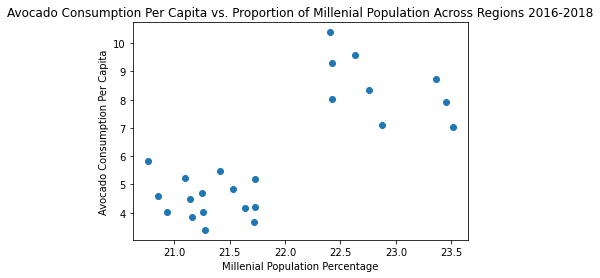

In [21]:
millenial_percent = df['millenial_pop_percent']
avo_cap = df['per_cap_avo_sold']
plt.scatter(millenial_percent, avo_cap)
plt.title("Avocado Consumption Per Capita vs. Proportion of Millenial Population Across Regions 2016-2018")
plt.xlabel("Millenial Population Percentage")
plt.ylabel("Avocado Consumption Per Capita")
plt.show()